In [198]:
# importing various libraries used and example cases we wanted to explore
import numpy as np
import pandas as pd
import seaborn as sns
import demoji as demoji
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import nltk
import sklearn
import re
from PIL import Image
from scipy.stats import chi2_contingency
from datetime import datetime
from patsy import dmatrices
from nltk.corpus import wordnet
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# download the respective emoji codes for the cleaning process
demoji.download_codes()
# download stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

... OK (Got response in 0.37 seconds)
Writing emoji data to C:\Users\marvi\.demoji\codes.json ...
... OK


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
fullData = pd.read_csv('Tyler.csv')

In [4]:
# assign df format for viewing
pd.set_option('display.float_format', '{:.4f}'.format)

In [5]:
# basic description of numeriacl values only
fullData.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Unnamed: 0,id,created_at,timezone,user_id_str,day,hour,nlikes,nreplies,nretweets,geo,retweet_id
count,7198.00,7198.00,7198.00,7198.00,7198.00,7198.00,7198.00,7198.00,7198.00,7198.00,0.00,0.00
mean,3894.50,1408592986526988032.00,1624669712537.23,-700.00,604938362717310976.00,4.55,13.66,10.37,0.30,1.66,nan,nan
std,2078.03,813128103486021.25,193864844.48,0.00,594038687848908416.00,1.29,6.79,228.51,2.48,41.41,nan,nan
min,296.00,1403354590511255552.00,1623420782000.00,-700.00,2367911.00,1.00,0.00,0.00,0.00,0.00,nan,nan
25%,2095.25,1408288778426397696.00,1624597183250.00,-700.00,427822685.00,4.00,8.00,0.00,0.00,0.00,nan,nan
50%,3894.50,1408447500416118784.00,1624635025500.00,-700.00,750970591184846848.00,5.00,14.00,0.00,0.00,0.00,nan,nan
75%,5693.75,1408819296376093696.00,1624723669000.00,-700.00,1226023675834568704.00,5.00,21.00,1.00,0.00,0.00,nan,nan
max,7493.00,1411216842375393280.00,1625295289000.00,-700.00,1410979756825223168.00,7.00,23.00,13519.00,96.00,2744.00,nan,nan


In [6]:
# include non-numerical
fullData.describe(include='all')

,Unnamed: 0,id,created_at,date,timezone,place,tweet,language,hashtags,user_id_str,username,day,hour,retweet,nlikes,nreplies,nretweets,geo,retweet_id
count,7198.0000,7198.0000,7198.0000,7198,7198.0000,10,7198,7198,7198,7198.0000,7198,7198.0000,7198.0000,7198,7198.0000,7198.0000,7198.0000,0.0000,0.0000
unique,nan,nan,nan,6979,nan,10,7009,33,931,nan,5669,nan,nan,1,nan,nan,nan,nan,nan
top,nan,nan,nan,2021-06-24 21:34:16,nan,"{'type': 'Point', 'coordinates': [34.0564, -11...",#callmeifyougetlost,en,['callmeifyougetlost'],nan,rvy_thecreator,nan,nan,False,nan,nan,nan,nan,nan
freq,nan,nan,nan,4,nan,1,61,5256,5397,nan,60,nan,nan,7198,nan,nan,nan,nan,nan
mean,3894.5000,1408592986526988032.0000,1624669712537.2327,NaN,-700.0000,NaN,NaN,NaN,NaN,604938362717310976.0000,NaN,4.5510,13.6553,NaN,10.3679,0.2974,1.6556,nan,nan
std,2078.0280,813128103486021.2500,193864844.4830,NaN,0.0000,NaN,NaN,NaN,NaN,594038687848908416.0000,NaN,1.2887,6.7915,NaN,228.5117,2.4758,41.4094,nan,nan
min,296.0000,1403354590511255552.0000,1623420782000.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,2367911.0000,NaN,1.0000,0.0000,NaN,0.0000,0.0000,0.0000,nan,nan
25%,2095.2500,1408288778426397696.0000,1624597183250.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,427822685.0000,NaN,4.0000,8.0000,NaN,0.0000,0.0000,0.0000,nan,nan
50%,3894.5000,1408447500416118784.0000,1624635025500.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,750970591184846848.0000,NaN,5.0000,14.0000,NaN,0.0000,0.0000,0.0000,nan,nan
75%,5693.7500,1408819296376093696.0000,1624723669000.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,1226023675834568704.0000,NaN,5.0000,21.0000,NaN,1.0000,0.0000,0.0000,nan,nan


In [7]:
# description of objects only
fullData.describe(include=['object'])

,date,place,tweet,language,hashtags,username
count,7198,10,7198,7198,7198,7198
unique,6979,10,7009,33,931,5669
top,2021-06-24 21:34:16,"{'type': 'Point', 'coordinates': [34.0564, -11...",#callmeifyougetlost,en,['callmeifyougetlost'],rvy_thecreator
freq,4,1,61,5256,5397,60


In [8]:
# missing values actual #
fullData.isnull().sum()

Unnamed: 0        0
id                0
created_at        0
date              0
timezone          0
place          7188
tweet             0
language          0
hashtags          0
user_id_str       0
username          0
day               0
hour              0
retweet           0
nlikes            0
nreplies          0
nretweets         0
geo            7198
retweet_id     7198
dtype: int64

In [9]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing above for better understanding given the size.
for col in fullData.columns:
    pct_missing = np.mean(fullData[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
id - 0%
created_at - 0%
date - 0%
timezone - 0%
place - 100%
tweet - 0%
language - 0%
hashtags - 0%
user_id_str - 0%
username - 0%
day - 0%
hour - 0%
retweet - 0%
nlikes - 0%
nreplies - 0%
nretweets - 0%
geo - 100%
retweet_id - 100%


In [106]:
# changes to the dataframe to work with originally established code. While working on the project scraping output had changed 
fullData["text"] = fullData["tweet"]
fullData["retweetcount"] = fullData["nretweets"]
fullData["likecount"] = fullData["nlikes"]
fullData["replycount"] = fullData["nreplies"]
fullData["created_at"] = fullData["date"]

In [15]:
# preliminary examiniation of the post's text
pd.Series(np.concatenate([x.split() for x in fullData.text])).value_counts().head(50)

#CallMeIfYouGetLost    3660
#callmeifyougetlost    2775
the                    1707
@tylerthecreator       1569
to                     1152
is                     1095
I                      1090
a                       993
album                   924
#TylerTheCreator        820
Tyler                   805
and                     786
on                      758
this                    702
of                      663
you                     514
#CALLMEIFYOUGETLOST     502
new                     479
for                     474
in                      464
me                      445
my                      437
The                     399
it                      398
that                    368
so                      363
like                    285
with                    270
This                    259
Creator                 253
YOU                     236
just                    235
Tyler,                  235
his                     232
but                     216
was                 

In [109]:
# Create stop word list
stop_words = nltk.corpus.stopwords.words('english')

# Keep negative words for sentiment implications, along with "you", "me" because it is a part of the title of the album
kept_words = ['me', 'you', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 
              'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
              'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
              "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', 
              "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]    

# words we want to keep with our analysis
for word in kept_words:
    stop_words.remove(word)

# Manually remove stop words
def noStopWords(text):
    for stopword in stop_words:
        stopword = ' ' + stopword + ' '
        text = text.replace(stopword, ' ')
    return text

In [110]:
# Manually remove stemming
# stemming removed the contextual understanding of a post so used lem. instead
def noStem(text):
    stemmer = nltk.porter.PorterStemmer()
    stemmed = ' '.join([stemmer.stem(token) for token in text.split()])
    return stemmed

In [111]:
# manually clean the text
def cleanTweet(text):
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweets:
    text = re.sub(r'RT : ', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Make all lowercase
    text = text.lower()
    return text

In [112]:
# manually removing the emojis from the text
def noEmoji(text):
    removing = demoji.findall(text)
    for item in removing.keys():
        text = text.replace(item,"")
    return text

In [113]:
# capture the specific position of a word so grammatically the lemmatizer would make sense
def get_wordnet_pos(text):
    if text.startswith('J'):
        return wordnet.ADJ
    elif text.startswith('V'):
        return wordnet.VERB
    elif text.startswith('N'):
        return wordnet.NOUN
    elif text.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [114]:
# create df for analysis
cleanFullData = fullData

In [115]:
# logic for removing repeated posts for a specific user i.e. I can copy someone else's tweet 
# and post that once, before that's considered spam. If I as a user share the exact same post, 
# then duplicates won't be included. Left it separated from above cleaning, if we want to report either case
# For this analysis reassign and removed duplicated posts from the same user

cleanFullData["unique"] = cleanFullData["username"] + cleanFullData["text"]
cleanFullData = cleanFullData.drop_duplicates(subset = ["unique"])


In [116]:
# applying manual clean
cleanFullData["text"] = cleanFullData["text"].apply(cleanTweet)

<ipython-input-116-13929c29a941>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFullData["text"] = cleanFullData["text"].apply(cleanTweet)


In [117]:
# remove emojis
cleanFullData["text"] = cleanFullData["text"].apply(noEmoji)

<ipython-input-117-4a95345df221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFullData["text"] = cleanFullData["text"].apply(noEmoji)


In [118]:
# remove stop words
cleanFullData["text"] = cleanFullData["text"].apply(noStopWords)

<ipython-input-118-6e653d5824a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFullData["text"] = cleanFullData["text"].apply(noStopWords)


In [119]:
# checking for any empty posts
cleanFullData = cleanFullData.drop(cleanFullData[cleanFullData['text'] ==''].index)

In [120]:
# apply lem. to change word forms
cleanFullData["text_lem"] = cleanFullData["text"].apply(word_tokenize)
cleanFullData["text_lem"] = cleanFullData["text_lem"].apply(nltk.tag.pos_tag)

In [121]:
# finding position
cleanFullData["text_lem"] = cleanFullData["text_lem"].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# lem the words then reappend them
wnl = WordNetLemmatizer()
cleanFullData["text"] = cleanFullData["text_lem"].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
cleanFullData["text"] = [' '.join(map(str, l)) for l in cleanFullData["text"]]

In [122]:
# cleaning the data
cleanFullData["text"] = cleanFullData["text"].str.strip()

In [123]:
# manually convert hashtags to lower case to ensure consistency
cleanFullData["hashtagsLower"] = cleanFullData["hashtags"].str.lower() 

In [124]:
# make a list
cleanFullData["hashtagsList"] = cleanFullData["hashtagsLower"].to_list()

In [125]:
# take the converted list and separate the hashtags
cleanFullData["hashtagsList"] = cleanFullData["hashtagsList"].str.split(" ", n = 200, expand = True)

In [126]:
# and create a count of the hashtags
cleanFullData["hashtagsCount"] = cleanFullData["hashtagsList"].str.len()

# creating a count of the text after it's been transformed 
cleanFullData["textCount"] = cleanFullData["text"].str.len()

In [127]:
# checking the lem. worked
cleanFullData.head(3)

,Unnamed: 0,id,created_at,date,timezone,place,tweet,language,hashtags,user_id_str,...,text,retweetcount,likecount,replycount,unique,text_lem,hashtagsLower,hashtagsList,hashtagsCount,textCount
0,296,1411216842375393280,2021-07-02 23:54:49,2021-07-02 23:54:49,-700,NaN,#CallMeIfYouGetLost https://t.co/ICtkq5HlOO,und,['callmeifyougetlost'],332628015,...,callmeifyougetlost,0,1,0,KennyKalrissian#CallMeIfYouGetLost https://t....,"[(callmeifyougetlost, n)]",['callmeifyougetlost'],['callmeifyougetlost'],22,18
1,297,1411215960200019974,2021-07-02 23:51:18,2021-07-02 23:51:18,-700,NaN,Call Me If You Get Lost pixel art baby! @tyler...,en,['callmeifyougetlost'],1214398461958713344,...,call me you get lose pixel art baby callmeifyo...,0,2,0,itsmelogan123Call Me If You Get Lost pixel art...,"[(call, v), (me, n), (you, n), (get, v), (lost...",['callmeifyougetlost'],['callmeifyougetlost'],22,54
2,298,1411188191453921280,2021-07-02 22:00:58,2021-07-02 22:00:58,-700,NaN,#CallMeIfYouGetLost IS THE NUMBER ONE ALBUM IN...,en,['callmeifyougetlost'],28645027,...,callmeifyougetlost number one album country am...,1,6,0,UncleMcFly#CallMeIfYouGetLost IS THE NUMBER ON...,"[(callmeifyougetlost, n), (number, n), (one, n...",['callmeifyougetlost'],['callmeifyougetlost'],22,59


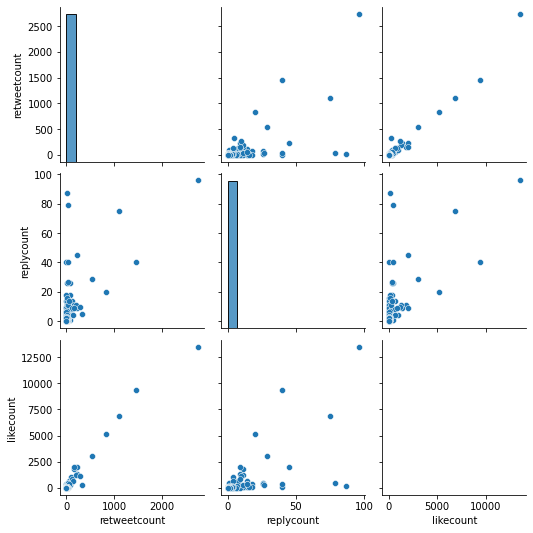

In [169]:
sns.pairplot(cleanFullData[['retweetcount', 'replycount', 'likecount']])

In [157]:
# lookinng at how many times a user has posted, top 10
cleanFullData['username'].value_counts().head(10)

Text(0.5, 1.0, 'Correlation Matrix\n')

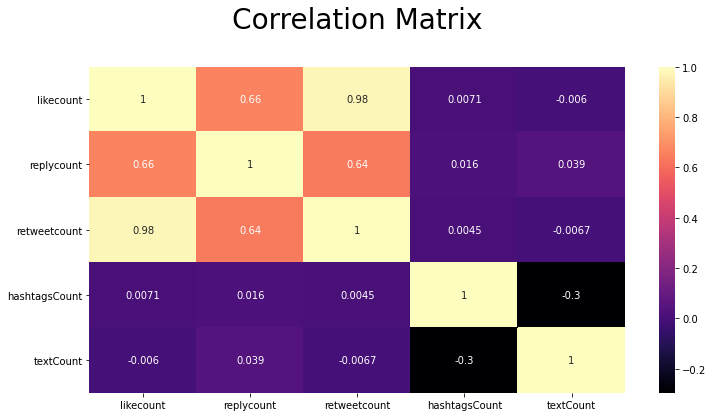

In [128]:
# correlation matrix
fig, ax = plt.subplots(figsize=(12,6))
cleanFullData[['likecount','replycount','retweetcount', 'hashtagsCount', 'textCount']].corr()
sns.heatmap(cleanFullData[['likecount','replycount','retweetcount', 'hashtagsCount', 'textCount']].corr(), annot=True, cmap = "magma")
ax.set_title("Correlation Matrix\n", size = 28)

In [129]:
# counting the most occuring in pct
count = cleanFullData["hashtagsList"].value_counts(normalize = True).head(5)
count

['callmeifyougetlost']   0.7499
['callmeifyougetlost',   0.0948
['tylerthecreator',      0.0661
['planether',            0.0075
['cmiygl',               0.0026
Name: hashtagsList, dtype: float64

In [130]:
count.describe()

count   5.0000
mean    0.1842
std     0.3186
min     0.0026
25%     0.0075
50%     0.0661
75%     0.0948
max     0.7499
Name: hashtagsList, dtype: float64

<ipython-input-131-ab5e91f1c998>:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(count, colors = colors,


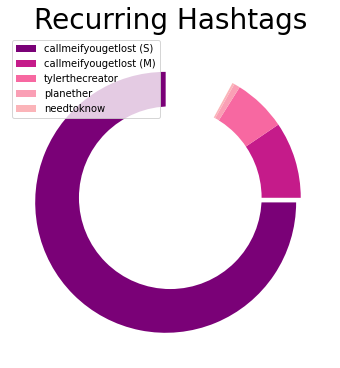

In [131]:
# showing that pie
fig, ax = plt.subplots(figsize=(12,6))
labels = 'callmeifyougetlost (S)', 'callmeifyougetlost (M)', 'tylerthecreator', 'planether', 'needtoknow', 'others'
colors = '#7a0177', '#c51b8a', '#f768a1', '#fa9fb5', '#fbb4b9', '#feebe2'
expansion = (0.05, 0.0, 0.0, 0.0, 0.0)

plt.pie(count, colors = colors,
       startangle = 90, pctdistance = 0.85, labeldistance =10, explode = expansion)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.set_title("Recurring Hashtags", size = 28)
ax.legend(labels)
plt.show()


In [132]:
# defining subjectivity and polarity to understand sentiment using TextBlob
def getTextSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getTextPolarity(text):
    return TextBlob(text).sentiment.polarity

In [133]:
# capturing pol. and sub.
cleanFullData['subjectivity'] = cleanFullData['text'].apply(getTextSubjectivity)

cleanFullData['polarity'] = cleanFullData['text'].apply(getTextPolarity)

In [134]:
# funciton to define sentiment
def getTextAnalysis(a):
    if a > 0:
        return "Positive"
    elif a == 0:
        return "Neutral"
    else:
        return "Negative"

In [135]:
# capturing sentiment
cleanFullData["sentiment"] = cleanFullData['polarity'].apply(getTextAnalysis)

In [136]:
# changing date type to look at 3 distinct periods
cleanFullData["created_at"] = pd.to_datetime(cleanFullData['created_at'])
cleanFullData['date'] = pd.to_datetime(cleanFullData['date']).dt.date

In [137]:
# how we assign the date against targets
def getDatePost(a):
    # date of release
    date_str = "2021-06-25"
    date =  datetime.strptime(date_str, '%Y-%m-%d').date()
    if a < date:
        return "PRE"
    elif a == date:
        return "ON"
    else:
        return "POST"

In [138]:
# capturing hype status
cleanFullData['hype_loop'] = cleanFullData['date'].apply(getDatePost)

In [139]:
# counting sentiment
cleanFullData["sentiment"].value_counts(normalize = True)

Neutral    0.5829
Positive   0.3225
Negative   0.0946
Name: sentiment, dtype: float64

In [140]:
# counting post type based on date
cleanFullData["hype_loop"].value_counts(normalize = True)

PRE    0.3584
ON     0.3489
POST   0.2927
Name: hype_loop, dtype: float64

In [141]:
daysBeforeDrop = cleanFullData['date'].value_counts().sort_index(ascending=True)

Text(0, 0.5, 'Frequency of Tweet Containing #PlanetHer')

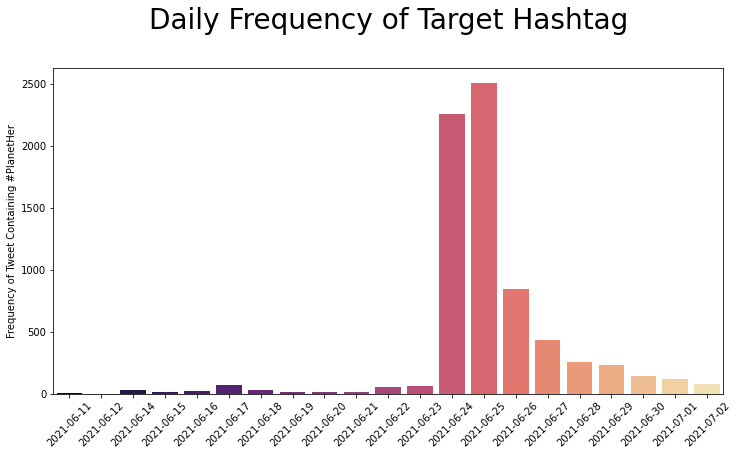

In [142]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x = daysBeforeDrop.index, y = daysBeforeDrop, palette="magma")
plt.xticks(rotation=45)
ax.set_title("Daily Frequency of Target Hashtag\n", size = 28)
ax.set_ylabel("Frequency of Tweet Containing #PlanetHer")

In [143]:
dayBeforeReleaseHoursFirstDay = cleanFullData[cleanFullData['date'] == pd.to_datetime('2021-06-24')]['created_at'].dt.hour

Text(0.5, 0, 'Time Posted')

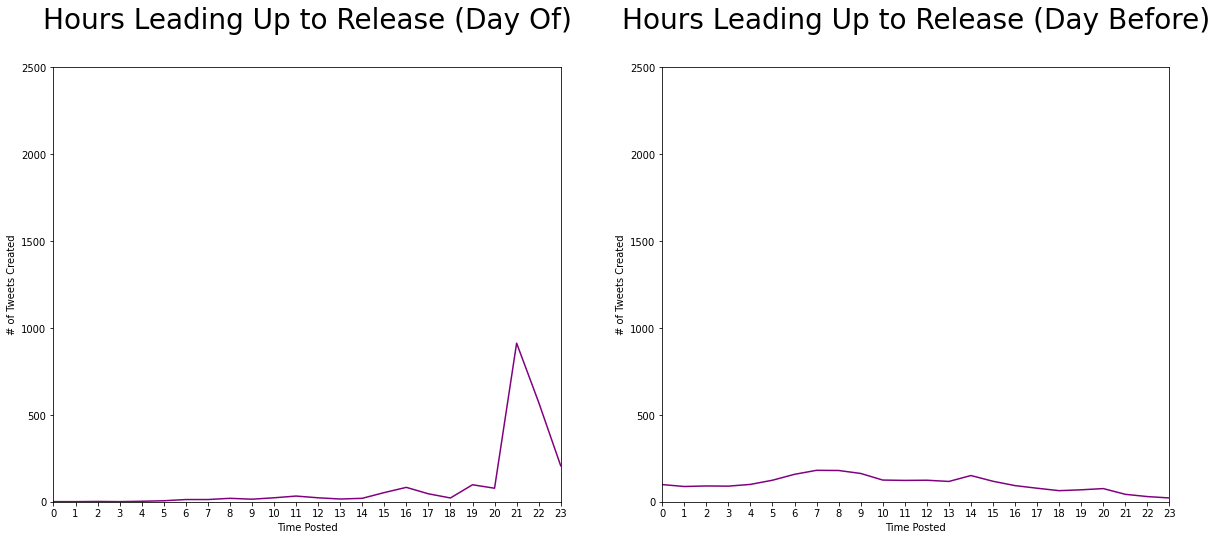

In [144]:
dayBeforeReleaseHours = cleanFullData[cleanFullData['date'] == pd.to_datetime('2021-06-25')]['created_at'].dt.hour
#day_before_release_hours_df.index = pd.to_datetime(day_before_release_hours_df.index, format = '%H')

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.lineplot(x = dayBeforeReleaseHoursFirstDay.value_counts().sort_index(ascending=True).index,
             y = dayBeforeReleaseHoursFirstDay.value_counts().sort_index(ascending=True), ax = ax1, color = "purple")

sns.lineplot(x = dayBeforeReleaseHours.value_counts().sort_index(ascending=True).index,
             y = dayBeforeReleaseHours.value_counts().sort_index(ascending=True), ax = ax2, color = "purple")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.set_ylim(0,2500)
ax1.set_xlim(0,23)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.set_ylim(0,2500)
ax2.set_xlim(0,23)

# Doja Cat's album dropped about the time the tweet frequency peaks
ax1.set_title("Hours Leading Up to Release (Day Of)\n", size = 28)
ax1.set_ylabel("# of Tweets Created")
ax1.set_xlabel("Time Posted")

# Doja Cat's album dropped about the time the tweet frequency peaks
ax2.set_title("Hours Leading Up to Release (Day Before)\n", size = 28)
ax2.set_ylabel("# of Tweets Created")
ax2.set_xlabel("Time Posted")


In [58]:
# assign twitter logo to mask
mask = np.array(Image.open("twitter.png"))
# know that the collection of mask is 0 and needs to be reassigned
# mask 

In [59]:
# function to reassign 0 within mask to 255
def transformMask(value):
    if value == 0:
        return 255
    else:
        return value

In [60]:
# created a multidimensional array
maskable_image = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

In [61]:
# rewrite within new md array 
for i in range(len(mask)):
    maskable_image[i] = list(map(transformMask, mask[i]))

In [62]:
maskable_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

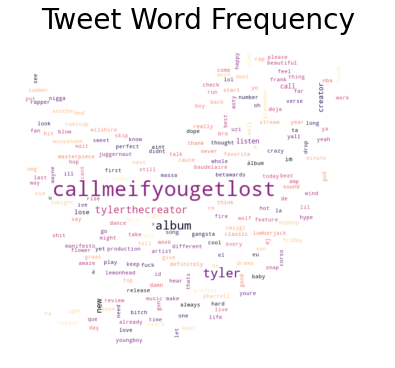

In [202]:
# creating a word cloud of the text 
fig, ax = plt.subplots(figsize=(12,6))
words = ' '.join([text for text in cleanFullData['text']])
# set collocations to false to show unique words instead of auto collections
wordCloud = WordCloud(width=600, height=400, collocations=False,
                     colormap="magma", mask = maskable_image, background_color = "white").generate(words)

ax.set_title("Tweet Word Frequency", size = 28)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Tweet Sentiment')

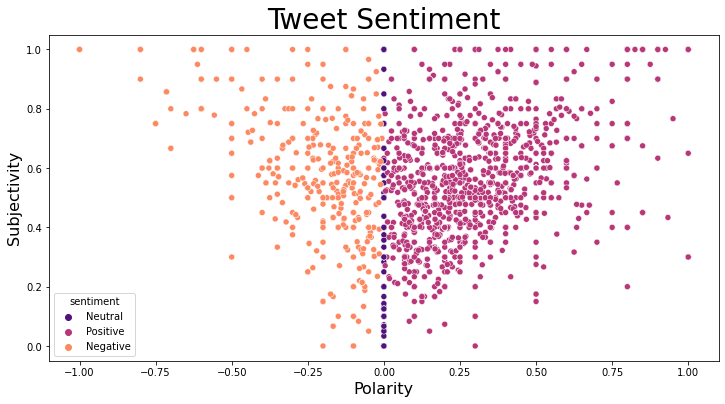

In [66]:
pol = cleanFullData['polarity']
sub = cleanFullData['subjectivity']
sen = cleanFullData['sentiment']

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = pol, y = sub, data = cleanFullData, hue = "sentiment", palette = "magma")

ax.set_xlabel("Polarity", size = 16)
ax.set_ylabel("Subjectivity", size = 16)
ax.set_title("Tweet Sentiment", size = 28)

In [67]:
# creating contingency table
contingency_table = pd.crosstab(cleanFullData['hype_loop'], cleanFullData['sentiment'])

Text(87.0, 0.5, 'Sentiment')

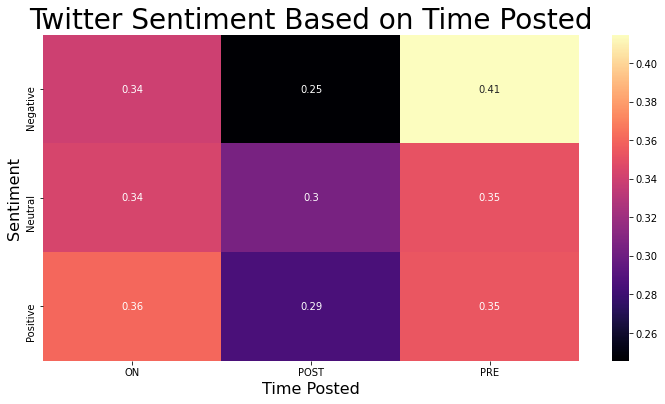

In [68]:
# reporting as a percentage
contingency_pct = pd.crosstab(cleanFullData['sentiment'], cleanFullData['hype_loop'], normalize='index')
contingency_pct

plt.figure(figsize = (12,6))
sns.heatmap(contingency_pct, annot = True, cmap = "magma")
plt.title("Twitter Sentiment Based on Time Posted", fontsize = 28)
plt.xlabel("Time Posted", fontsize = 16)
plt.ylabel("Sentiment", fontsize = 16)

In [69]:
# calculating chi-test because we are looking at the relationship of two categorical variables
c, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.5
# H0 no relationship between time of post and the sentiment
# H1 a relationship exists and expect positive to increase up to and day of the release while negative increases after
# Assume human online nature that consumers are more likely to share negative criticisms after experiencing something whiie inverserly are more likely
# to 'hype' something prior to release

print("The p-value is: " + str(p))

if p <= alpha:
    print("Reject H0: A relationship exists.")
else:
    print("Accept H0: The variables don't have a relationship.")
    
# preliminary data suggests over time a relationship exists. We want to collect more data to better understand the specifics between pre, on and post
    

The p-value is: 0.003532317569795391
Reject H0: A relationship exists.


In [70]:
# check the count to train/test the model
cleanFullData.describe()

,Unnamed: 0,id,timezone,user_id_str,day,hour,nlikes,nreplies,nretweets,geo,retweet_id,retweetcount,likecount,replycount,hashtagsCount,textCount,subjectivity,polarity
count,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000,0.0000,0.0000,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000,7185.0000
mean,3891.3662,1408593615271510016.0000,-700.0000,604135224231899776.0000,4.5516,13.6564,10.3844,0.2980,1.6580,nan,nan,1.6580,10.3844,0.2980,21.0031,59.1987,0.2490,0.0818
std,2076.3107,812017739406835.2500,0.0000,593912282570112384.0000,1.2890,6.7908,228.7180,2.4780,41.4468,nan,nan,41.4468,228.7180,2.4780,2.8554,39.7443,0.3193,0.2432
min,296.0000,1403354590511255552.0000,-700.0000,2367911.0000,1.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,0.0000,0.0000,0.0000,6.0000,18.0000,0.0000,-1.0000
25%,2094.0000,1408288863932588032.0000,-700.0000,425453888.0000,4.0000,8.0000,0.0000,0.0000,0.0000,nan,nan,0.0000,0.0000,0.0000,22.0000,32.0000,0.0000,0.0000
50%,3890.0000,1408447896744120320.0000,-700.0000,750970591184846848.0000,5.0000,14.0000,0.0000,0.0000,0.0000,nan,nan,0.0000,0.0000,0.0000,22.0000,49.0000,0.0000,0.0000
75%,5688.0000,1408819680123437056.0000,-700.0000,1225975640106700800.0000,5.0000,21.0000,1.0000,0.0000,0.0000,nan,nan,0.0000,1.0000,0.0000,22.0000,73.0000,0.5000,0.1364
max,7493.0000,1411216842375393280.0000,-700.0000,1410979756825223168.0000,7.0000,23.0000,13519.0000,96.0000,2744.0000,nan,nan,2744.0000,13519.0000,96.0000,29.0000,274.0000,1.0000,1.0000


In [74]:
# calculate the % used for train
7185 * .75

5388.75

In [75]:
# assigning train and test for different model comparisons
# regular assignment
# train is 75% and test os 25%
model_train = cleanFullData[:5388]
model_test = cleanFullData[5388:]

In [76]:
# vectorizaiton of data for testing and training
# looking at sequence of two words when range = (2,2)
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(2,2),min_df=8)
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)

(5388, 280) (1797, 280)


In [77]:
# Check the # of assigned sentiment already in train
model_train.sentiment.value_counts()

Neutral     3116
Positive    1789
Negative     483
Name: sentiment, dtype: int64

In [78]:
# Check the # of assigned sentiment already in test
model_test.sentiment.value_counts()

Neutral     1072
Positive     528
Negative     197
Name: sentiment, dtype: int64

In [79]:
# For comparative analysis construct numerical categories for the three types of sentiments
def getLabel(a):
    if a > 0:
        return 1
    elif a == 0:
        return 0
    else:
        return -1
    
train_labels = model_train['polarity'].apply(getLabel)
test_labels = model_test['polarity'].apply(getLabel)

In [ ]:
### when going through the 3 models:
# unigram - unique words in the text
# uni + bigram - permutations of two consecutive words
# uni + bi + trigram - permutations of three consecutive words

              precision    recall  f1-score   support

    Negative       0.90      0.55      0.68       197
     Neutral       0.87      0.99      0.92      1072
    Positive       0.92      0.79      0.85       528

    accuracy                           0.88      1797
   macro avg       0.90      0.78      0.82      1797
weighted avg       0.89      0.88      0.88      1797



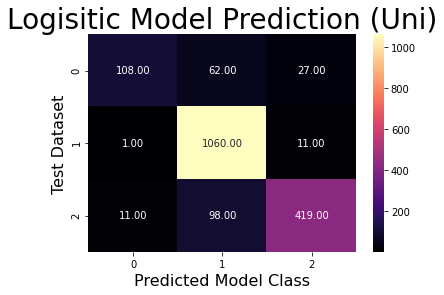

In [93]:
# logistic + uni
clf = sklearn.linear_model.LogisticRegression(max_iter=9000)
clf.fit(tf_features_train, train_labels)
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign macro accuracy score
L1score = "90%"

cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("Logisitic Model Prediction (Uni)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 29613) (1797, 29613)
              precision    recall  f1-score   support

    Negative       0.89      0.59      0.71       197
     Neutral       0.89      0.99      0.93      1072
    Positive       0.93      0.83      0.87       528

    accuracy                           0.90      1797
   macro avg       0.90      0.80      0.84      1797
weighted avg       0.90      0.90      0.89      1797



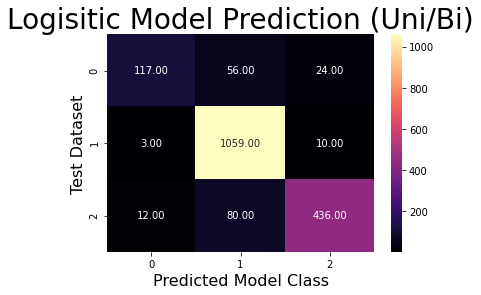

In [94]:
# logistic + uni/bi
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print(tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.linear_model.LogisticRegression(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(test_labels, predictions)
# assign accuracy score
L2score = "90%"

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("Logisitic Model Prediction (Uni/Bi)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 55995) (1797, 55995)
              precision    recall  f1-score   support

    Negative       0.90      0.55      0.68       197
     Neutral       0.87      0.99      0.92      1072
    Positive       0.92      0.79      0.85       528

    accuracy                           0.88      1797
   macro avg       0.90      0.78      0.82      1797
weighted avg       0.89      0.88      0.88      1797



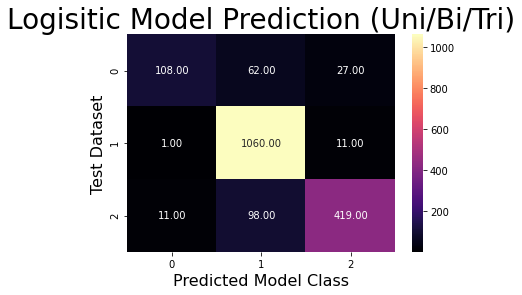

In [95]:
# logistic + uni/bi/tri
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.linear_model.LogisticRegression(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
L3score = "90%"

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("Logisitic Model Prediction (Uni/Bi/Tri)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 6724) (1797, 6724)
              precision    recall  f1-score   support

    Negative       0.91      0.76      0.83       197
     Neutral       0.96      0.99      0.97      1072
    Positive       0.93      0.92      0.93       528

    accuracy                           0.95      1797
   macro avg       0.93      0.89      0.91      1797
weighted avg       0.95      0.95      0.95      1797



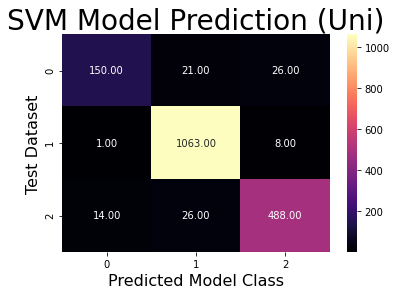

In [96]:
# SVM + uni
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC(max_iter=9000)
clf.fit(tf_features_train, train_labels)
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
SVM1score = "93%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("SVM Model Prediction (Uni)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 29613) (1797, 29613)
              precision    recall  f1-score   support

    Negative       0.88      0.66      0.76       197
     Neutral       0.93      0.99      0.96      1072
    Positive       0.93      0.88      0.90       528

    accuracy                           0.92      1797
   macro avg       0.91      0.84      0.87      1797
weighted avg       0.92      0.92      0.92      1797



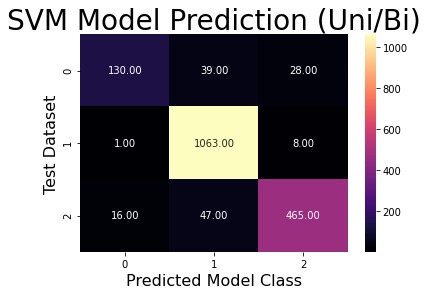

In [97]:
# SVM + uni/bi
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
SVM2score = "91%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("SVM Model Prediction (Uni/Bi)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 55995) (1797, 55995)
              precision    recall  f1-score   support

    Negative       0.90      0.61      0.73       197
     Neutral       0.90      0.99      0.95      1072
    Positive       0.93      0.86      0.89       528

    accuracy                           0.91      1797
   macro avg       0.91      0.82      0.85      1797
weighted avg       0.91      0.91      0.91      1797



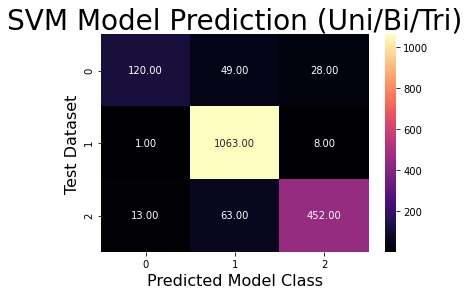

In [98]:
# SVM + uni/bi/tri
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
SVM3score = "91%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("SVM Model Prediction (Uni/Bi/Tri)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 6724) (1797, 6724)
              precision    recall  f1-score   support

    Negative       0.92      0.18      0.30       197
     Neutral       0.93      0.88      0.90      1072
    Positive       0.66      0.93      0.77       528

    accuracy                           0.82      1797
   macro avg       0.84      0.66      0.66      1797
weighted avg       0.85      0.82      0.80      1797



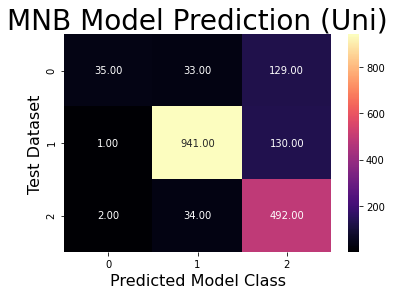

In [99]:
# MNB is similar methodology used with TextBlob
# MNB + uni
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
MNB1score = "84%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("MNB Model Prediction (Uni)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 29613) (1797, 29613)
              precision    recall  f1-score   support

    Negative       0.92      0.18      0.30       197
     Neutral       0.91      0.86      0.89      1072
    Positive       0.65      0.92      0.76       528

    accuracy                           0.80      1797
   macro avg       0.83      0.65      0.65      1797
weighted avg       0.84      0.80      0.79      1797



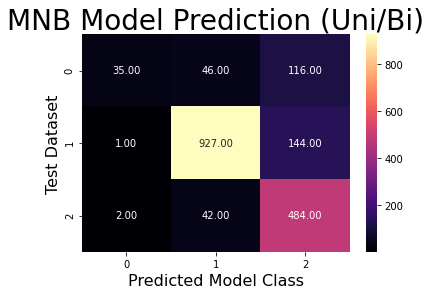

In [100]:
# MNB + uni/bi
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
MNB2score = "83%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("MNB Model Prediction (Uni/Bi)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(5388, 55995) (1797, 55995)
              precision    recall  f1-score   support

    Negative       0.91      0.16      0.28       197
     Neutral       0.91      0.87      0.89      1072
    Positive       0.65      0.90      0.76       528

    accuracy                           0.80      1797
   macro avg       0.82      0.65      0.64      1797
weighted avg       0.83      0.80      0.78      1797



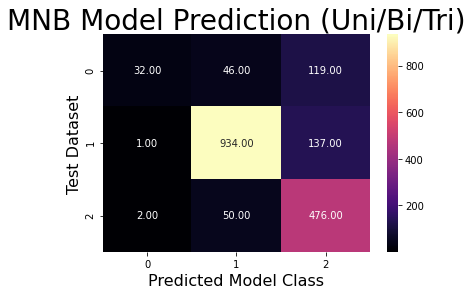

In [101]:
# MNB + uni/bi/tri
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
MNB3score = "82%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("MNB Model Prediction (Uni/Bi/Tri)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

In [102]:
# create a table of the macro prcision results 
# these results reflected full training/test sets without the removal of duplicate through the df4 rewritting
# the higher the percentage, demonstrates improvement of accuracy
# using macro avg precision for reporting
results = {'Model': ['Logistic Regression', 'Linear SVM', 'Multinomial NB'],
           'Unigram': [L1score,SVM1score, MNB1score],
           'Uni-Bi/Gram': [L2score, SVM2score, MNB2score],
           'Uni-Bi-Tri/Gram':[L3score, SVM3score, MNB3score]}
dfResults = pd.DataFrame(results, columns = ['Model', 'Unigram','Uni-Bi/Gram', 'Uni-Bi-Tri/Gram' ])
print(dfResults)

                 Model Unigram Uni-Bi/Gram Uni-Bi-Tri/Gram
0  Logistic Regression     78%         90%             90%
1           Linear SVM     93%         91%             91%
2       Multinomial NB     84%         83%             82%


In [103]:
# assign vars of interest for the model
vars = ['likecount', 'textCount', 'hashtagsCount', 'retweetcount', 'replycount']

# assign varibles of interest from the data frame
cleanFullDataModel = cleanFullData[vars]

# droping any NaN
cleanFullDataModel = cleanFullDataModel.dropna() 

# create matrices for the visualization 
y, X = dmatrices('likecount ~ hashtagsCount + textCount + retweetcount + replycount', data = cleanFullDataModel, return_type = 'dataframe')

In [104]:
# fit our model ~ with the data collected, we wanted to observe primarily the use of hashtags and established
# some controls 
# create our model
model = sm.OLS(y, X)

# fit our model
results = model.fit()

# summarize the results similar to other output like Stata/R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              likecount   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 5.650e+04
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:01:41   Log-Likelihood:                -36723.
No. Observations:                7185   AIC:                         7.346e+04
Df Residuals:                    7180   BIC:                         7.349e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7927      3.959     -0.453